In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import csv

#df = pd.read_csv('data.csv')
#print(df.to_string()) 

# Data Extraction

In [4]:
file = open("./results_data/model 7 (dtw 0.7)/spacing0.58/data1.csv" , "r")
data = list(csv.reader(file,delimiter=","))
preds= []
pred_time =[]
targets = []
time= []
hit = []

#data extraction
for i in range(1,101):
    #print(i)
    data[i] = [j for j in data[i] if j]
    idx1=data[i].index("time")
    preds.append([eval(i) for i in data[i][1:idx1]])
    idx2=data[i].index("target")
    pred_time.append([float((i)[6:-1]) for i in data[i][idx1+1:idx2]])
    targets.append(int(data[i][-3]))
    time.append(float((data[i][-2])[6:-1]))
    hit.append(1 if data[i][-1]=='AI' else 0)

In [5]:
AI_pred1 = [preds[i] for i, x in enumerate(hit) if x == 1]
time_target1 = [time[i] for i, x in enumerate(hit) if x == 1]
AI_target1= [targets[i] for i, x in enumerate(hit) if x == 1]
AI_time1 = [pred_time[i] for i, x in enumerate(hit) if x == 1]

AI_pred = [x for i,x in enumerate(AI_pred1) if AI_pred1[i][-1] == AI_target1[i]]
time_target = [x for i,x in enumerate(time_target1) if AI_pred1[i][-1] == AI_target1[i]]
AI_target = [x for i,x in enumerate(AI_target1) if AI_pred1[i][-1] == AI_target1[i]]
AI_time = [x for i,x in enumerate(AI_time1) if AI_pred1[i][-1] == AI_target1[i]]

time_faster = []
for i in range(len(AI_pred)):
   # print(i)
    try:
        idx = len(AI_pred[i])-np.where(np.array(AI_pred[i][::-1]) != AI_target[i])[0][0]
    except IndexError:
        idx = 0
    time_faster.append(time_target[i]-AI_time[i][idx]) 
    if(time_faster[-1]<0):
        time_faster.pop(-1)



8

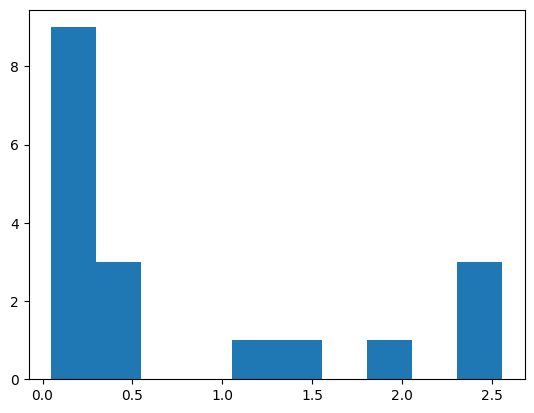

In [6]:
y, x, _ = plt.hist(time_faster, bins = 10)
time_faster.index(min(time_faster))




In [7]:
print("time: ",x[np.where(y == max(y))[0][0]],"seconds")
print("Accuracy: ",len(AI_pred),"%")

time:  0.04800000000000182 seconds
Accuracy:  19 %
